# IMDB dataset binary classification

In [2]:
from sklearn.metrics import auc, precision_recall_curve, roc_curve
from tensorflow.keras.datasets import imdb
from tensorflow.keras import layers, models, optimizers
import numpy as np
import matplotlib.pyplot as plt

## Data loading and exploration

In [3]:
num_words=10000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_words)

In [4]:
def review_decoder(coded_review):
    '''Decodes a review back to English words'''
    word_index = imdb.get_word_index()
    reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
    decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in coded_review])
    return decoded_review

In [5]:
print('Coded review: {0}\n'.format(train_data[0]))
print('Decoded review: {0}\nRating: {1}'.format(review_decoder(train_data[0]), train_labels[0]))

Coded review: [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]

Decoded review: ? this film was just brillian

In [6]:
print('Coded review: {0}\n'.format(train_data[100]))
print('Decoded review: {0}\nRating: {1}'.format(review_decoder(train_data[100]), train_labels[100]))

Coded review: [1, 13, 244, 6, 87, 337, 7, 628, 2219, 5, 28, 285, 15, 240, 93, 23, 288, 549, 18, 1455, 673, 4, 241, 534, 3635, 8448, 20, 38, 54, 13, 258, 46, 44, 14, 13, 1241, 7258, 12, 5, 5, 51, 9, 14, 45, 6, 762, 7, 2, 1309, 328, 5, 428, 2473, 15, 26, 1292, 5, 3939, 6728, 5, 1960, 279, 13, 92, 124, 803, 52, 21, 279, 14, 9, 43, 6, 762, 7, 595, 15, 16, 2, 23, 4, 1071, 467, 4, 403, 7, 628, 2219, 8, 97, 6, 171, 3596, 99, 387, 72, 97, 12, 788, 15, 13, 161, 459, 44, 4, 3939, 1101, 173, 21, 69, 8, 401, 2, 4, 481, 88, 61, 4731, 238, 28, 32, 11, 32, 14, 9, 6, 545, 1332, 766, 5, 203, 73, 28, 43, 77, 317, 11, 4, 2, 953, 270, 17, 6, 3616, 13, 545, 386, 25, 92, 1142, 129, 278, 23, 14, 241, 46, 7, 158]

Decoded review: ? i am a great fan of david lynch and have everything that he's made on dvd except for hotel room the 2 hour twin peaks movie so when i found out about this i immediately grabbed it and and what is this it's a bunch of ? drawn black and white cartoons that are loud and foul mouthed a

## Data preprocessing

In [7]:
def vectorize_sequences(sequences, dimension=10000):
    '''
    Turns the coded reviews into vectors of 0s and 1s. 
    The vector will contain 0 if the word number is not in the coded review, else it will contain 1.
    
    '''
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [8]:
# Preprocess de data to get a binary matrix, in which all reviews have same length
train_input = vectorize_sequences(train_data)
test_input = vectorize_sequences(test_data)

train_labels = np.asarray(train_labels).astype('float32')
test_labels = np.asarray(test_labels).astype('float32')

## Data split

In [9]:
# Split train dataset into validation and train
val_input = train_input[:10000]
train_input = train_input[10000:]

val_labels = train_labels[:10000]
train_labels = train_labels[10000:]

## Neural network

In [10]:
# Network architecture
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(num_words,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))     
          
#Compile the model
opt = optimizers.RMSprop(lr=0.001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [11]:
# Train network
history = model.fit(train_input, train_labels, epochs=20, batch_size=512, validation_data=(val_input, val_labels))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 97us/sample - loss: 0.4968 - acc: 0.7792 - val_loss: 0.3683 - val_acc: 0.8688
Epoch 2/20
15000/15000 [==============================] - 1s 72us/sample - loss: 0.2879 - acc: 0.9041 - val_loss: 0.3215 - val_acc: 0.8695
Epoch 3/20
15000/15000 [==============================] - 1s 64us/sample - loss: 0.2131 - acc: 0.9292 - val_loss: 0.2747 - val_acc: 0.8905
Epoch 4/20
15000/15000 [==============================] - 1s 65us/sample - loss: 0.1711 - acc: 0.9420 - val_loss: 0.2753 - val_acc: 0.8907
Epoch 5/20
15000/15000 [==============================] - 1s 64us/sample - loss: 0.1343 - acc: 0.9563 - val_loss: 0.2850 - val_acc: 0.8871
Epoch 6/20
15000/15000 [==============================] - 1s 64us/sample - loss: 0.1132 - acc: 0.9651 - val_loss: 0.2964 - val_acc: 0.8854
Epoch 7/20
15000/15000 [==============================] - 1s 64us/sample - loss: 0.0947 - acc: 0.9701 - val_loss: 0.

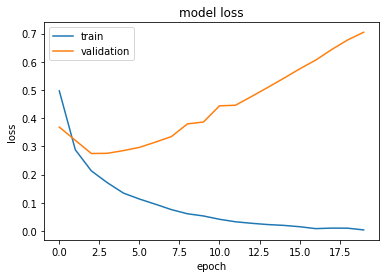

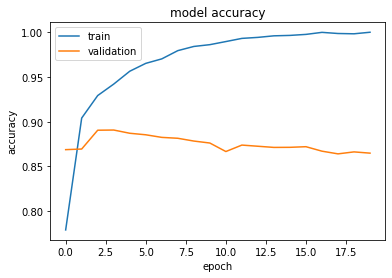

In [12]:
# Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Results analysis

In [13]:
test_loss, test_acc = model.evaluate(test_input, test_labels)
print(test_loss, test_acc)

25000/25000 [==============================] - 1s 59us/sample - loss: 0.7710 - acc: 0.8502
0.771018017513752 0.85016


In [14]:
pred_train = model.predict(train_input, batch_size=512)
pred_val = model.predict(val_input, batch_size=512)
pred_test = model.predict(test_input, batch_size=512)

In [15]:
def plot_roc_curve(objective, results_probs):
    '''Plots ROC curve'''
    fpr, tpr, thresholds = roc_curve(objective, results_probs)
    auroc = auc(fpr, tpr)
    
    auprc_random = 0.5
    plt.figure(figsize=(8,8))
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
    lw=lw, label='AUROC curve (area = %0.2f)' % auroc)
    plt.plot([0.0, 1.0], [0.0, 1.0], color='navy', linestyle='--',
    lw=lw, label='random AUROC curve (area = %0.2f)' % auprc_random)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('1 - Specificity', fontsize=18)
    plt.ylabel('Sensitivity', fontsize=18)
    plt.title('Roc curve', fontsize=18)
    plt.legend(loc="lower right", fontsize=18)
    plt.show()
    return 

def plot_pr_curve(objective, results_probs):
    '''Plots precision-recall curve'''
    precision, recall, thresholds = precision_recall_curve(objective, results_probs)
    auprc = auc(recall, precision)

    precision_random, recall_random, thresholds_random = precision_recall_curve(objective, np.random.rand(len(objective)))
    auprc_random = auc(recall_random, precision_random)
    plt.figure(figsize=(8,8))
    lw = 2
    plt.plot(recall, precision, color='darkorange',
    lw=lw, label='AUPRC curve (area = %0.2f)' % auprc)
    plt.plot([0, 1], [auprc_random, auprc_random], color='navy', linestyle='--',
    lw=lw, label='random AUPRC curve (area = %0.2f)' % auprc_random)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('Recall', fontsize=18)
    plt.ylabel('Precision', fontsize=18)
    plt.title('Precision-Recall curve', fontsize=18)
    plt.legend(loc="lower right", fontsize=18)
    plt.show()
    return 

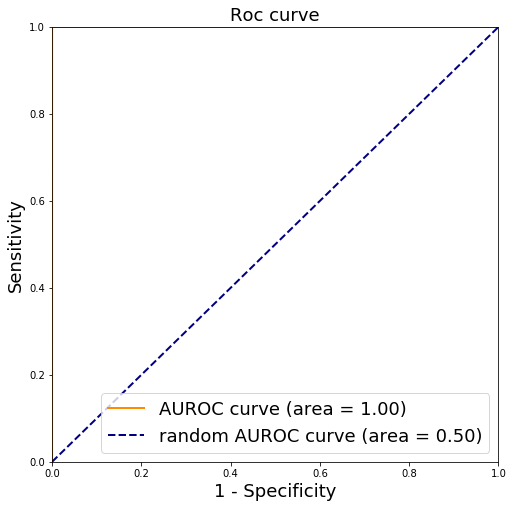

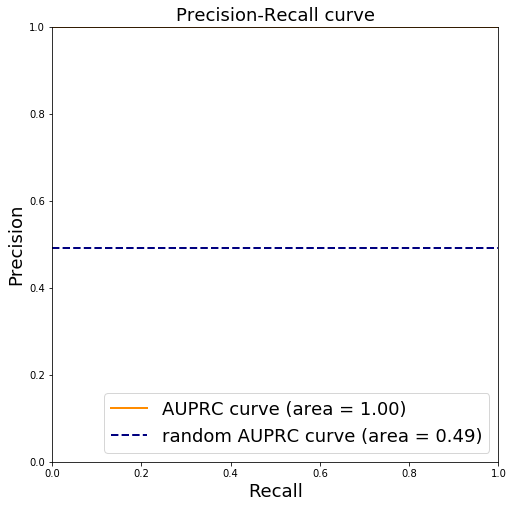

In [16]:
# Plot train roc and precision recall curves
plot_roc_curve(train_labels, pred_train)
plot_pr_curve(train_labels, pred_train)

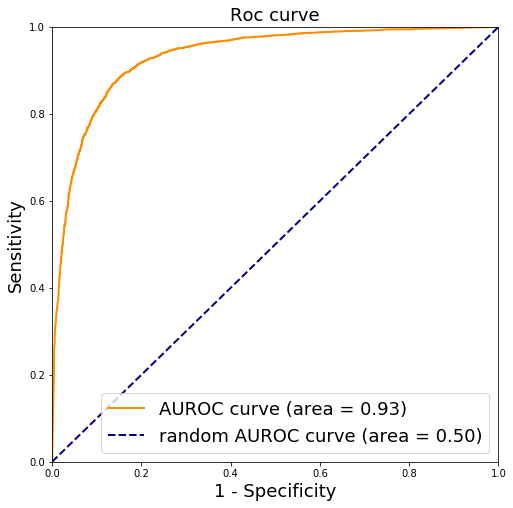

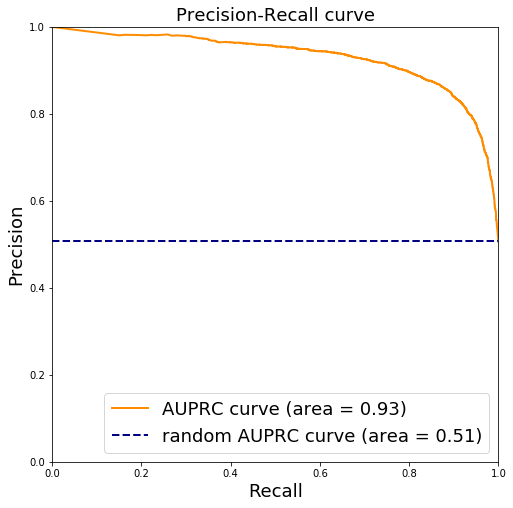

In [17]:
# Plot validation roc and precision recall curves
plot_roc_curve(val_labels, pred_val)
plot_pr_curve(val_labels, pred_val)

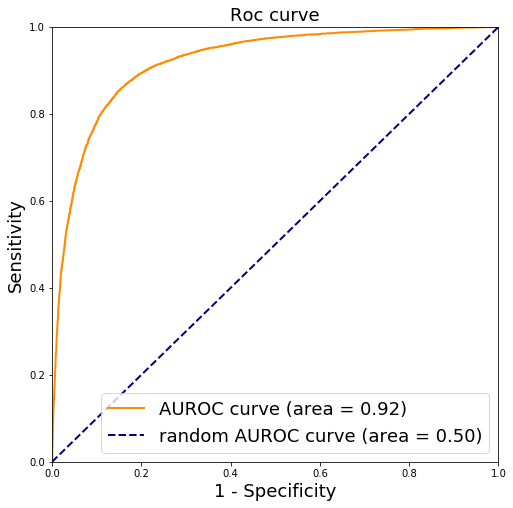

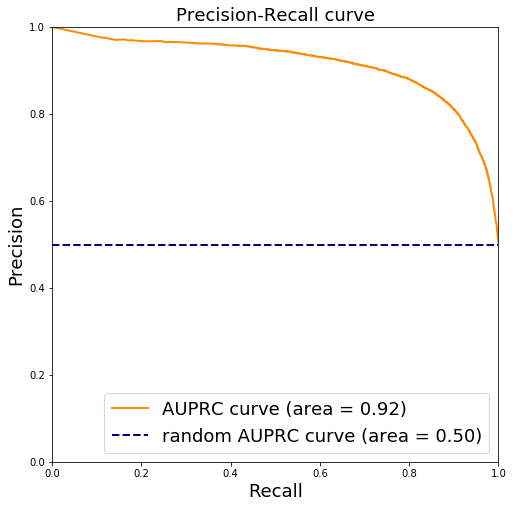

In [18]:
# Plot test roc and precision recall curves
plot_roc_curve(test_labels, pred_test)
plot_pr_curve(test_labels, pred_test)